# 앙상블 학습

앙상블 학습(Ensemble Learning)을 통한 분류는 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법을 말한다. 

이미지, 영상, 음성 등의 비정형 데이터의 분류는 딥러닝이 뛰어난 성능을 보이지만, 대부분의 정형 데이터 분류에는 앙상블이 뛰어난 성능을 보인다.

앙상블 학습의 유형은 보팅(Voting), 배깅(Bagging), 부스팅(Boosting), 스태킹(Stacking) 등이 있다.

보팅과 배깅은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식이다. 보팅과 배깅의 다른 점은 보팅의 경우 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합, 배깅은 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행. 대표적인 배깅 방식이 랜덤 포레스트 알고리즘이다.

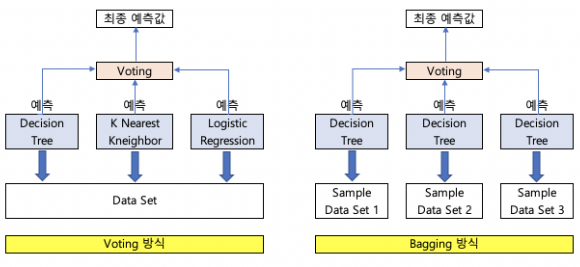

부스팅은 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에는 가중치(weight)를 부여하면서 학습과 예측을 진행하는 것이다. 대표적인 부스팅 모듈로 그래디언트 부스트, XGBoost(eXtra Gradient Boost), LightGBM(Light Gradient Boost)이 있다.

스태킹은 여러 가지 다른 모델의 예측 결과값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과를 예측하는 방법.


# 보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)

하드 보팅을 이용한 분류는 다수결 원칙과 비슷하다. 예측한 결과값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결과값으로 선정.

소프트 보팅은 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결과값으로 선정. 일반적으로 소프트 보팅이 보팅 방법으로 적용된다.

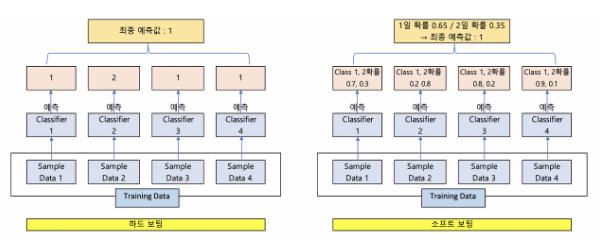

# 보팅 분류기(Voting Classifier)

사이킷런은 보팅 방식의 앙상블을 구현한 VotingClassifier 클래스를 제공.

사이킷런에서 제공되는 위스콘신 유방암 데이터 세트를 이용해 보팅 방식의 앙상블을 적용.

In [ ]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


로지스틱 회귀와 KNN을 기반으로 하여 소프트 보팅 방식으로 새롭게 보팅 분류기를 만든다. 사이킷런은 VotingClassifier 클래스를 이용해 보팅 분류기 생성. 

VotingClassifier 클래스는 주요 생성 인자로 estimators와 voting 값을 입력 받는다. esimators는 리스트 값으로 보팅에 사용될 여러 개의 Classifier 객체들은 튜플 형식으로 입력 받으며 voting은 'hard' 또는 'soft'를 입력하여 보팅 방식 적용, default='hard'

In [ ]:
# 개별 모델은 로지스틱 회귀와 KNN
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classiciers = [lr_clf, knn_clf]
for c in classiciers:
    c.fit(X_train, y_train)
    pred = c.predict(X_test)
    print('{0} 정확도 : {1:.4f}'.format(c, accuracy_score(y_test, pred)))

Voting 분류기 정확도 : 0.9474
LogisticRegression() 정확도 : 0.9386
KNeighborsClassifier(n_neighbors=8) 정확도 : 0.9386


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


보팅 분류기의 정확도가 조금 더 높게 나왔다. 보팅으로 여러 개의 기반 분류기를 결합한다고 해서 무조건 높게 나오는 것은 아니다. 데이터의 특성과 분포 등 다양한 요건에 따라 다르다. 하지만 앙상블 방법은 전반적으로 다른 단일 ML 알고리즘보다 뛰어난 예측 성능을 가지는 경우가 많다.